## CIFAR-10 images
### 32x32x3 images


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
from tensorflow.keras.datasets import cifar10

In [112]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [78]:
len(y_test)

10000

In [79]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [80]:
sample=x_train[30]

In [81]:
sample.shape

(32, 32, 3)

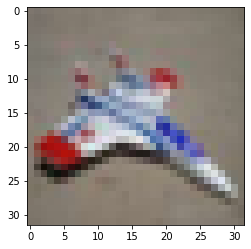

In [82]:
plt.imshow(sample)

In [83]:
y_train[1]

array([9], dtype=uint8)

In [84]:
x_train=x_train/255
x_test=x_test/255


In [85]:
from tensorflow.keras.utils import to_categorical

In [86]:
y_cat_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [88]:
model=Sequential()

In [89]:
#conv and pool
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#conv and pool
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#flattening
model.add(Flatten())
model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))


In [90]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [92]:
from tensorflow.keras.callbacks import EarlyStopping

In [129]:
early_stop =EarlyStopping(monitor='val_loss',patience=2)

In [94]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 0.2428 - accuracy: 0.4268 - val_loss: 0.2162 - val_accuracy: 0.5011
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.1948 - accuracy: 0.5648 - val_loss: 0.1867 - val_accuracy: 0.5905
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.1754 - accuracy: 0.6178 - val_loss: 0.1805 - val_accuracy: 0.5962
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.1622 - accuracy: 0.6551 - val_loss: 0.1648 - val_accuracy: 0.6442
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.1507 - accuracy: 0.6836 - val_loss: 0.1648 - val_accuracy: 0.6551
Epoch 6/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.1406 - accuracy: 0.7081 - val_loss: 0.1648 - val_accuracy: 0.6579
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.1318 - accuracy: 0.7322 - val_loss: 0.1547 -

In [95]:
metrics=pd.DataFrame(model.history.history)

In [96]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.242834,0.42680,0.216188,0.5011
1,0.194798,0.56484,0.186710,0.5905
2,0.175409,0.61782,0.180479,0.5962
3,0.162246,0.65514,0.164813,0.6442
4,0.150667,0.68358,0.164778,0.6551
5,0.140554,0.70812,0.164817,0.6579
6,0.131791,0.73216,0.154662,0.6844
7,0.123503,0.75320,0.158708,0.6808
8,0.115404,0.77400,0.162835,0.6773


<AxesSubplot:>

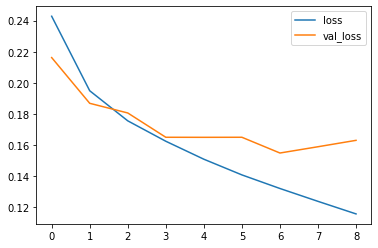

In [97]:
metrics[['loss', 'val_loss']].plot()

In [98]:
from sklearn.metrics import classification_report,confusion_matrix

In [122]:
predictions = model.predict(x_test)
# classes=np.array([])
p=[]
for r in range(0,len(predictions)):
    out=np.where(predictions[r]==predictions[r].max())
    p.append(out)
    


In [108]:
np.where(predictions[0]==predictions[0].max())

(array([3], dtype=int64),)